# Pokemon

In [1]:
import concurrent.futures
import math
import matplotlib.pyplot as plt
import pandas
import requests
from tqdm.notebook import tqdm as tqdm_notebook

## Types

18 ['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']


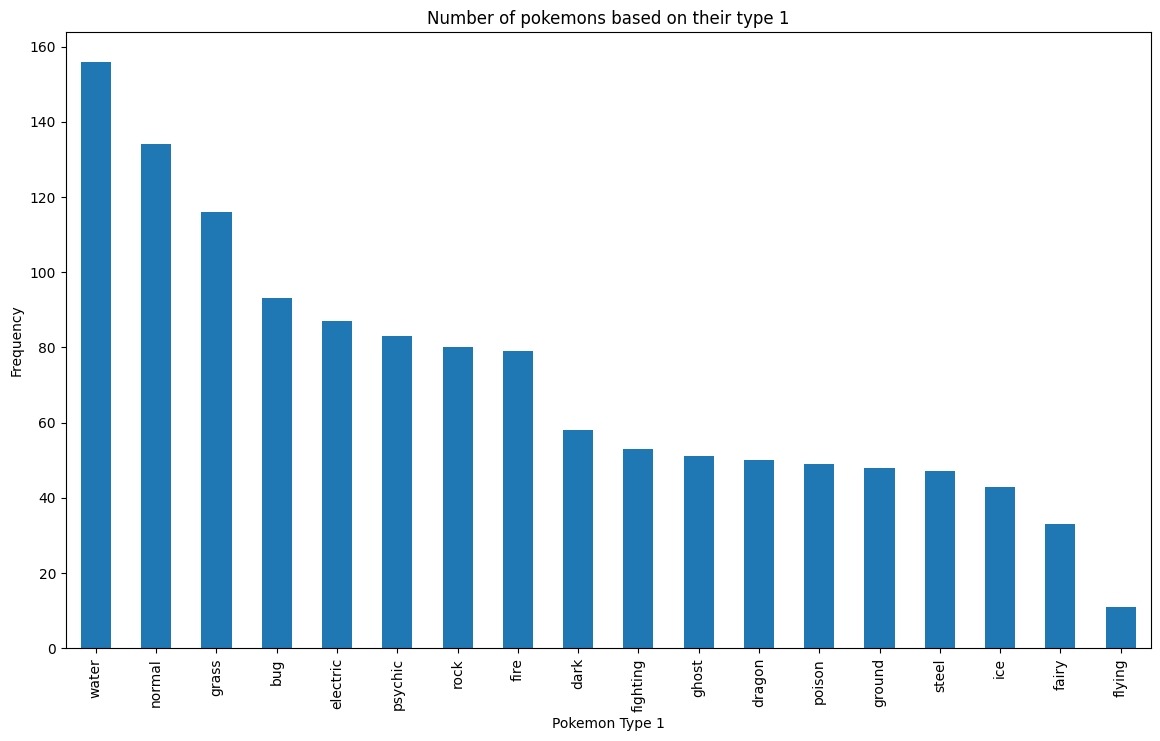

In [2]:
pokemon_data_frame = pandas.read_csv('data/pokemon.csv')

ax = pokemon_data_frame['type_1'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of pokemons based on their type 1")
ax.set_xlabel("Pokemon Type 1")
ax.set_ylabel("Frequency")

list_of_type_1 = list(set(list(pokemon_data_frame.type_1.values.tolist())))
list_of_type_1.sort()
print(len(list_of_type_1), list_of_type_1)
file_type_1 = open("./data/types.txt", "w")
file_type_1.write("\n".join(list_of_type_1))
file_type_1.close()

## Generation

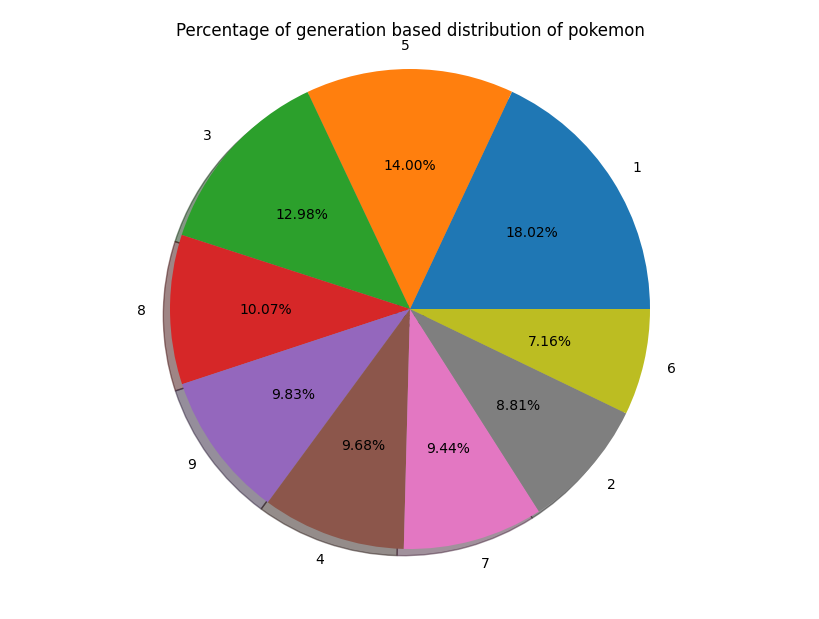

In [3]:
generation =  dict(pokemon_data_frame['generation'].value_counts())
gen_counts = generation.values() # No of pokemon in each generation
gen = generation.keys()  # Type of generation
fig = plt.figure(figsize=(8, 6))
fig.suptitle("Percentage of generation based distribution of pokemon")
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.pie(gen_counts, labels = gen, autopct='%1.2f%%', shadow=True, explode=None)
plt.show()

## Legendary

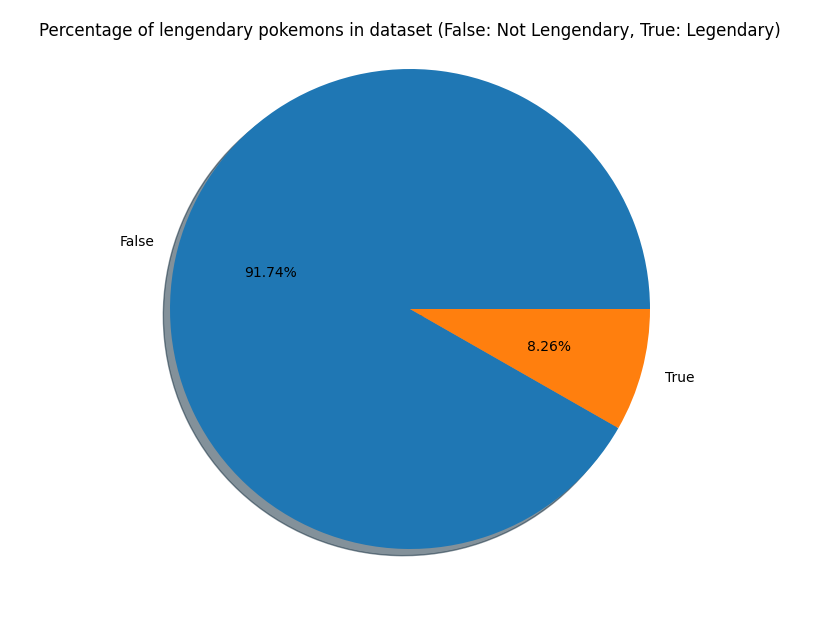

In [4]:
# Plot the number of legendary and non-legendary pokemon
generation =  dict(pokemon_data_frame['is_legendary'].value_counts())
gen_counts = generation.values() 
gen = generation.keys()
fig = plt.figure(figsize=(8, 6))
fig.suptitle("Percentage of lengendary pokemons in dataset (False: Not Lengendary, True: Legendary)")
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.pie(gen_counts, labels = gen,autopct='%1.2f%%', shadow=True, explode=None)
plt.show()

## Combat

In [5]:
type_chart_data_frame = pandas.read_csv("./data/type-chart.csv", index_col="attacking")

pokemon_data_frame = pandas.read_csv("./data/pokemon.csv")
pokemon = pokemon_data_frame.to_dict('records')

combats = []

for pokemon_a in tqdm_notebook(pokemon):
    id_a = pokemon_a.get("id", "")
    type_a = pokemon_a.get("type_1", "")
    combat = {
        "pokemon": id_a
    }
    total = 0
    for pokemon_b in pokemon:
        id_b = pokemon_b.get("id", "")
        type_b_1 = pokemon_b.get("type_1", "")
        type_b_2 = pokemon_b.get("type_2", "")
        # Result
        result_1 = type_chart_data_frame.loc[type_a][type_b_1]
        result_2 = 0
        if str(type_b_2) != "nan":
            result_2 = type_chart_data_frame.loc[type_a][type_b_2]
        result = result_1 + result_2
        combat[id_b] = result
        total += result
    combat["total"] = total
    combats.append(combat)

combats_data_frame = pandas.DataFrame.from_dict(combats)
sorted_combats_data_frame = combats_data_frame.sort_values(by = ["total"], ascending = True)
sorted_combats_data_frame.to_csv('data/combats.csv', index = False, header = True)

  0%|          | 0/1271 [00:00<?, ?it/s]